Principle Componenet Analysis
Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

### A Summary of the PCA Approach

 - Standardize the data.
 
 - Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or    perform Singular Vector Decomposition.
 
 - Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k         largest eigenvalues where k is the number of dimensions of the new feature  subspace (k≤d).
 
 - Construct the projection matrix W from the selected k eigenvectors.
 
 - Transform the original dataset X via W to obtain a k-dimensional feature subspace Y

    .




In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
iris = load_iris()
X = iris.data
y = iris.target
X.shape
#print(X)
#print(y)

(150, 4)

In [3]:
X_std = StandardScaler().fit_transform(X)
print(X_std)
print(X_std.shape)


[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 1 - Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. 

In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [5]:
#Covariance Matrix
import numpy as np
mean_vec = np.mean(X_std,axis=0)
#print(mean_vec)
cov_mat = (X_std - mean_vec).T.dot(X_std - mean_vec)/(X_std.shape[0]-1)
print ('Covariance matrix')
print (cov_mat)

Covariance matrix
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [6]:
#Alternative
cov_mat=np.cov(X_std.T)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### find eigenvalues and eigenvectors

In [7]:
eig_vals,eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


### 2 - Selecting Principal Components

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [8]:
#sort the eigenvalues in descending order
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
for i in eig_pairs:
    print(i)
    print (i[0])

(2.9380850501999927, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
2.9380850501999927
(0.9201649041624892, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
0.9201649041624892
(0.1477418210449476, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
0.1477418210449476
(0.020853862176462064, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))
0.020853862176462064


#### Explained Variance

After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [9]:
tot = sum(eig_vals)
print(tot)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print (var_exp)

4.026845637583892
[72.96244541329983, 22.850761786701817, 3.668921889282866, 0.5178709107154746]


In [10]:
a=np.array([1,2,3,4,5,6])
c=np.cumsum(a)
print(c)

cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[ 1  3  6 10 15 21]
[ 72.96244541  95.8132072   99.48212909 100.        ]


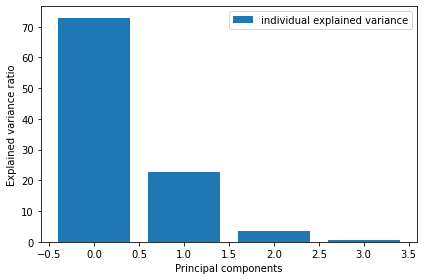

In [11]:
import matplotlib.pyplot as plt
plt.bar(range(4), var_exp,  align='center',label='individual explained variance')
#plt.step(range(4), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

In [12]:
for i in eig_pairs:
    print (i)

(2.9380850501999927, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(0.9201649041624892, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(0.1477418210449476, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(0.020853862176462064, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [13]:
#Take a sequence of arrays and stack them horizontally to make a single array.
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print  (matrix_w)


[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


### 3 - Projection Onto the New Feature Space

In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation

Y=X×W, where Y is a 150×2 matrix of our transformed samples.

In [14]:
X_std.shape,matrix_w.shape

((150, 4), (4, 2))

In [15]:
Y =X_std.dot(matrix_w)
Y

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

In [16]:
Y.shape

(150, 2)

[-2.26470281 -2.08096115 -2.36422905 -2.29938422 -2.38984217 -2.07563095
 -2.44402884 -2.23284716 -2.33464048 -2.18432817 -2.1663101  -2.32613087
 -2.2184509  -2.6331007  -2.1987406  -2.26221453 -2.2075877  -2.19034951
 -1.898572   -2.34336905 -1.914323   -2.20701284 -2.7743447  -1.81866953
 -2.22716331 -1.95184633 -2.05115137 -2.16857717 -2.13956345 -2.26526149
 -2.14012214 -1.83159477 -2.61494794 -2.44617739 -2.10997488 -2.2078089
 -2.04514621 -2.52733191 -2.42963258 -2.16971071 -2.28647514 -1.85812246
 -2.5536384  -1.96444768 -2.13705901 -2.0697443  -2.38473317 -2.39437631
 -2.22944655 -2.20383344]
[-0.4800266   0.67413356  0.34190802  0.59739451 -0.64683538 -1.48917752
 -0.0476442  -0.22314807  1.11532768  0.46901356 -1.04369065 -0.13307834
  0.72867617  0.96150673 -1.86005711 -2.68628449 -1.48360936 -0.48883832
 -1.40501879 -1.12784938 -0.40885571 -0.92412143 -0.45834367 -0.08555853
 -0.13725446  0.62561859 -0.24216355 -0.52714953 -0.31321781  0.3377319
  0.50454069 -0.42369507 -1

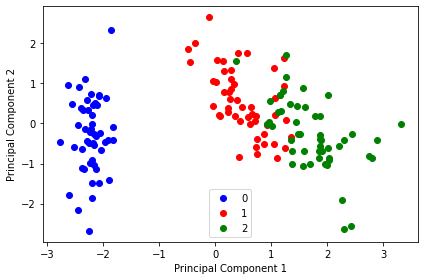

In [17]:
colors = ['blue', 'red', 'green']

for lab,col in zip(np.unique(y) ,colors):
    r=Y[y==lab,0]
    p=Y[y==lab,1]
    print(r)
    print(p)
    plt.scatter(r,p,label=lab,c=col)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()
    

### Shortcut - PCA in scikit-learn

In [18]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_std)
X_train_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [19]:
X_train_pca.shape

(150, 2)

0
[-2.26470281 -2.08096115 -2.36422905 -2.29938422 -2.38984217 -2.07563095
 -2.44402884 -2.23284716 -2.33464048 -2.18432817 -2.1663101  -2.32613087
 -2.2184509  -2.6331007  -2.1987406  -2.26221453 -2.2075877  -2.19034951
 -1.898572   -2.34336905 -1.914323   -2.20701284 -2.7743447  -1.81866953
 -2.22716331 -1.95184633 -2.05115137 -2.16857717 -2.13956345 -2.26526149
 -2.14012214 -1.83159477 -2.61494794 -2.44617739 -2.10997488 -2.2078089
 -2.04514621 -2.52733191 -2.42963258 -2.16971071 -2.28647514 -1.85812246
 -2.5536384  -1.96444768 -2.13705901 -2.0697443  -2.38473317 -2.39437631
 -2.22944655 -2.20383344]
1
[ 1.10178118  0.73133743  1.24097932  0.40748306  1.0754747   0.38868734
  0.74652974 -0.48732274  0.92790164  0.01142619 -0.11019628  0.44069345
  0.56210831  0.71956189 -0.0333547   0.87540719  0.35025167  0.15881005
  1.22509363  0.1649179   0.73768265  0.47628719  1.2341781   0.6328582
  0.70266118  0.87427365  1.25650912  1.35840512  0.66480037 -0.04025861
  0.13079518  0.0234526

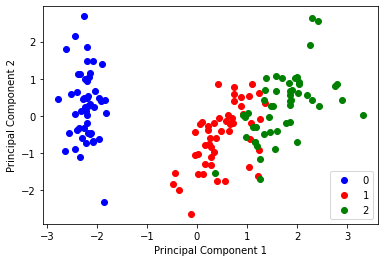

In [20]:
import numpy as np
from matplotlib import pyplot as plt
colors = ['blue', 'red', 'green']

for lab,col in zip(np.unique(y) ,colors):
    print(lab)
    print(X_train_pca[y==lab,0])
    plt.scatter(X_train_pca[y==lab,0],X_train_pca[y==lab,1],label=lab,c=col)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
#plt.tight_layout()
plt.show()
    

In [21]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])